<a href="https://colab.research.google.com/github/CarloGiorgio/Computational_Biolophysics/blob/main/Clustering/ising_cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ising model using Swendsen-Wang algorithm
Random cluster method with a 1d array of Spins. The neighbors are the one on the lattice

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Ising model in 1d array
L=5
sp=2*np.random.randint(2,size=L*L)-1
g=np.arange(L*L).reshape((L,L))
g

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [3]:
#List of neighbors
#function that finds once for all the neighobrs

def neig(i,k,L,g):
  l=[]
  for j in [-1,1]:
    l.extend([g[(i+j+L)%L,k],g[i,(k+j+L)%L]])
  return l.copy()

In [4]:
nei=[]
for i in range(L):
  for k in range(L):
      nei.append(neig(i,k,L,g))
nei=np.asarray(nei)
print(nei)
g=g.reshape(L*L)

[[20  4  5  1]
 [21  0  6  2]
 [22  1  7  3]
 [23  2  8  4]
 [24  3  9  0]
 [ 0  9 10  6]
 [ 1  5 11  7]
 [ 2  6 12  8]
 [ 3  7 13  9]
 [ 4  8 14  5]
 [ 5 14 15 11]
 [ 6 10 16 12]
 [ 7 11 17 13]
 [ 8 12 18 14]
 [ 9 13 19 10]
 [10 19 20 16]
 [11 15 21 17]
 [12 16 22 18]
 [13 17 23 19]
 [14 18 24 15]
 [15 24  0 21]
 [16 20  1 22]
 [17 21  2 23]
 [18 22  3 24]
 [19 23  4 20]]


In [5]:
#Creation of the cluster
"""
We create a list with the index of the cluster.
Run from a spin and check if it is or not in cluster
Then try to add to my
If added the algorithm will follow the new value 
It end when the index's array has no 0
"""
def new_advance(i,i_c,nei,Tr,sp):
  l=[]
  for n in nei[i]:
    if i_c[n]==0 and sp[i]==sp[n] and np.random.uniform()<Tr:
      l.append(n)
      i_c[n]=i_c[i]
  if l:
    for l_n in l:
      new_advance(l_n,i_c,nei,Tr,sp)
  
i_c=np.zeros(L*L)
i=0
k=0
T=0.001
Tr=1-np.exp(-2./T)
while True:
  while i_c[i]!=0:
    i+=1
  k+=1
  i_c[i]=k
  new_advance(i,i_c,nei,Tr,sp)
  if np.all(i_c!=0):
    break

In [6]:
cl=[]
for k in np.unique(i_c):
  cl.append(list(g[i_c==k]))
  print(g[i_c==k],sp[g[i_c==k]])

[0 4] [1 1]
[ 1  2  3  5  7  9 11 13 14 15 16 17 18 20 21 23 24] [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
[6] [1]
[8] [1]
[10] [1]
[12] [1]
[19] [1]
[22] [1]


In [64]:
def create_cluster(T,nei,L,sp):
  i_c=np.zeros(L*L)
  i=0
  k=0
  Tr=1-np.exp(-2./T)
  while True:
    while i_c[i]!=0:
      i+=1
    k+=1
    i_c[i]=k
    new_advance(i,i_c,nei,Tr,sp)
    if np.all(i_c!=0):
      break

  cl=[]
  g=np.arange(L*L)
  for k in np.unique(i_c):
    cl.append(list(g[i_c==k].copy()))
  return cl.copy()

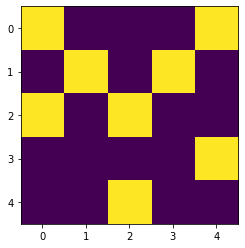

In [8]:
plt.imshow(sp.reshape((L,L)))

In [21]:
#Algorithm fo the temporal behaviour

L=16
sp=2*np.random.randint(2,size=L*L)-1
T=float(2.26)
m=[]
m_m=[]
m.append(float(sum(sp))/L/L)
m_m.append(m[-1])
tp_p=[0]


nei=[]
g=np.arange(L*L).reshape((L,L))

for i in range(L):
  for k in range(L):
    nei.append(neig(i,k,L,g))

tp=100
cl=[]
#k=[]
#l=[]

for t in range(1000):
    cl=create_cluster(T,nei,L,sp)
    
    if np.random.random()<0.5:
        r=np.random.randint(0,len(cl))
        sp[cl[r]]*=-1

    if t>tp:
      m.append(float(sum(sp))/L/L)
      m_m.append(float(sum((np.asarray(m)))))
      tp=int(tp*1.1)+1
      tp_p.append(tp)

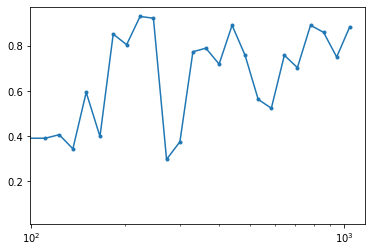

In [22]:
m=np.asarray(m)
#m_m=np.asarray(m_m)/len(m_m)
#plt.plot(abs(m_m))
plt.plot(tp_p,m_m,'.-')
plt.xscale('log')

In [80]:
#Function with the algorithm
#We focus on the observable that are the mean value of the magnetization

def traj(L,T):
  sp=2*np.random.randint(2,size=L*L)-1
  m=float(sum(sp))/L/L
  m_2=(float(sum(sp))/L/L)**2
  ma=abs(float(sum(sp))/L/L)
  nei=[]
  g=np.arange(L*L).reshape((L,L))

  for i in range(L):
    for k in range(L):
      nei.append(neig(i,k,L,g))

  #tp=100
  #k=0
  tp=200
  l=[]
  cl=[]
  tmax=1000
  for t in range(tmax):
      cl=create_cluster(T,nei,L,sp)
      
      if np.random.random()<0.5:
          r=np.random.randint(0,len(cl))
          sp[cl[r]]*=-1
          
      if t>tp:
        m+=(float(sum(sp))/L/L)
        ma+=abs(float(sum(sp))/L/L)
        m_2+=(float(sum(sp))/L/L)**2
          #tp=int(tp*1.1)+1
          #k+=1
  return (ma/(tmax-tp), m_2/(tmax-tp)-(ma/(tmax-tp))**2)

In [95]:
tw=np.linspace(1,3,30)
m=np.zeros(tw.shape[-1])
chi=m.copy()
for i,t in enumerate(tw):
  m[i],chi[i]=traj(20,t)

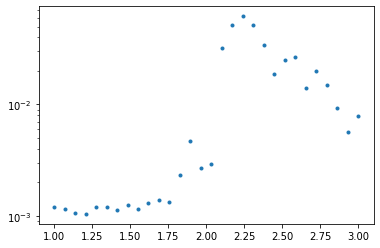

In [99]:
#plt.plot(tw,m,'.')
plt.plot(tw,chi,'.')
plt.yscale('log')